##A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
#Reading the file
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One-hot enconding the dataframe
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Creating X and y (features and lables)
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]


In [ ]:
X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [ ]:
#Creating training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#Building a neural network
tf.random.set_seed(42)
#1.Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])
#2.Compiling the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#3.Fiting the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
insurance_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Checking the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Trying to improve the model

Running two experiments:
1. Adding a extra layer with more hidden units
2. Train for longer


In [ ]:
#Model with hidden layers
tf.random.set_seed(42)

#1. Creat the model
model_1_0 = tf.keras.Sequential([
                                 tf.keras.layers.Dense(100),
                                 tf.keras.layers.Dense(10),
                                 tf.keras.layers.Dense(1)
])

#2. Compiling
model_1_0.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(0.01), #SGD doesn't work with that many layers :(
                  metrics=["mae"])

#3. Fiting
history = model_1_0.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_1_0.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3213 - mae: 3167.3213


[3167.3212890625, 3167.3212890625]

In [ ]:
#Model with hidden layers and more epoochs
tf.random.set_seed(42)

#1. Creat the model
model_1_1 = tf.keras.Sequential([
                                 tf.keras.layers.Dense(100),
                                 tf.keras.layers.Dense(10),
                                 tf.keras.layers.Dense(1)
])

#2. Compiling
model_1_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #SGD doesn't work with that many layers :(
                  metrics=["mae"])

#3. Fiting
model_1_1.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
model_1_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3186.3911 - mae: 3186.3911


[3186.39111328125, 3186.39111328125]

Text(0.5, 0, 'epochs')

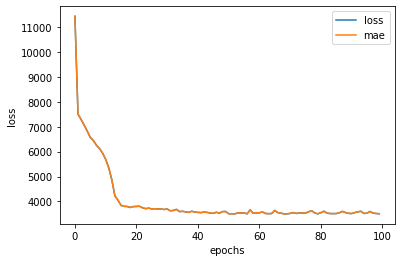

In [ ]:
#Plot history (aka trainig curve or loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> How long should you train for?

It depends on the problem you are working on, but TensorFlow has a solution the 'EarlyStopping Callback'


##Preprocessing data (normalization and standardization)

In terms of scaling values, neurals networks tend to prefer normalization. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Reload the dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data we will borrow a few classes from scikit-learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all this values betwen 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
#Creating x and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [ ]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Fiting the column transformer to our training data
ct.fit(X_train)


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
#Transforming training and testing data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#How does the data look like?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#Hows the shape
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.
Now lets build a neural network.

In [ ]:
#Building the neural network with the normalized data
tf.random.set_seed(42)

#1.Creating the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1000),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

#2.Compiling
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

#3.Fiting the model
model_2.fit(X_train_normal, y_train ,epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 4ms/step - loss: 9973.4062 - mae: 9973.4062
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 5540.5933 - mae: 5540.5933
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 3702.7673 - mae: 3702.7673
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 3639.8157 - mae: 3639.8157
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 3618.1912 - mae: 3618.1912
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 3689.9688 - mae: 3689.9688
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 3636.4888 - mae: 3636.4888
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 3641.6489 - mae: 3641.6489
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 3624.0967 - mae: 3624.0967
Epoch 10/300
34/34 [==============================] - 0s 4ms/step - loss: 3795.4944 - mae: 3795.4944

In [ ]:
#Evaluating our model on the normalized data
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.7246 - mae: 3162.7246


[3162.724609375, 3162.724609375]